# Qualitative comparison of optical STEM and BSD
---
**Author**: Arent Kievits

**Date**: 15-03-2023

### **Overview**
The purpose of this notebook is to show a qualitative comparison between OSTEM (Optical scanning transmission electron microscopy) and BSD
(Backscattered electron detection). 

### **Data**
Detector | Tissue | Staining | Landing energy (keV) | Dwell time (μs) | Beam current (nA) | 
- | - | - | - | - | - 
OSTEM | Zebrafish larval liver | reduced Os04 + NdAc | 4 | 5.1 | 0.4
BSD | Zebrafish larval liver | reduced Os04 + NdAc | 1.5 | 5.1 | 0.4
OSTEM | Rat pancreas islet of Langerhans | OTO | 4 | 10 | 0.4
BSD | Rat pancreas islet of Langerhans | OTO | 2 | 10 | 0.4

In [3]:
# Imports
import numpy as np
from pathlib import Path
import pandas as pd
from skimage import img_as_float
from skimage import exposure
import tifffile

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [6]:
# Find directory
DATA_dir = Path("../data/1_Qualitative-comparison/cropped")

# Select files and initialize DataFrame with image locations
df_im = pd.DataFrame({'FilePos': list(DATA_dir.glob('*.tif'))})

# Build up DataFrame
df_im['DetectionMode'] = df_im['FilePos'].apply(lambda x: x.name.split('_')[0])
df_im['Tissue'] = df_im['FilePos'].apply(lambda x: x.name.split('_')[1])
df_im['LE'] = df_im['FilePos'].apply(lambda x: x.name.split('_')[2].split('keV')[0])
df_im['Dwell'] = df_im['FilePos'].apply(lambda x: x.name.split('_')[3].split('ns')[0])
df_im['Mode'] = df_im['FilePos'].apply(lambda x: x.name.split('_')[4].split('.tif')[0])

# Preview
df_im

,FilePos,DetectionMode,Tissue,LE,Dwell,Mode
0,..\data\1_Qualitative-comparison\cropped\BSD_R...,BSD,Rat Pancreas,2,10000,UHR-1
1,..\data\1_Qualitative-comparison\cropped\BSD_Z...,BSD,Zebrafish Liver,1.5,5100,UHR
2,..\data\1_Qualitative-comparison\cropped\OSTEM...,OSTEM,Rat Pancreas,4,10000,UHR
3,..\data\1_Qualitative-comparison\cropped\OSTEM...,OSTEM,Zebrafish Liver,4,5100,UHR


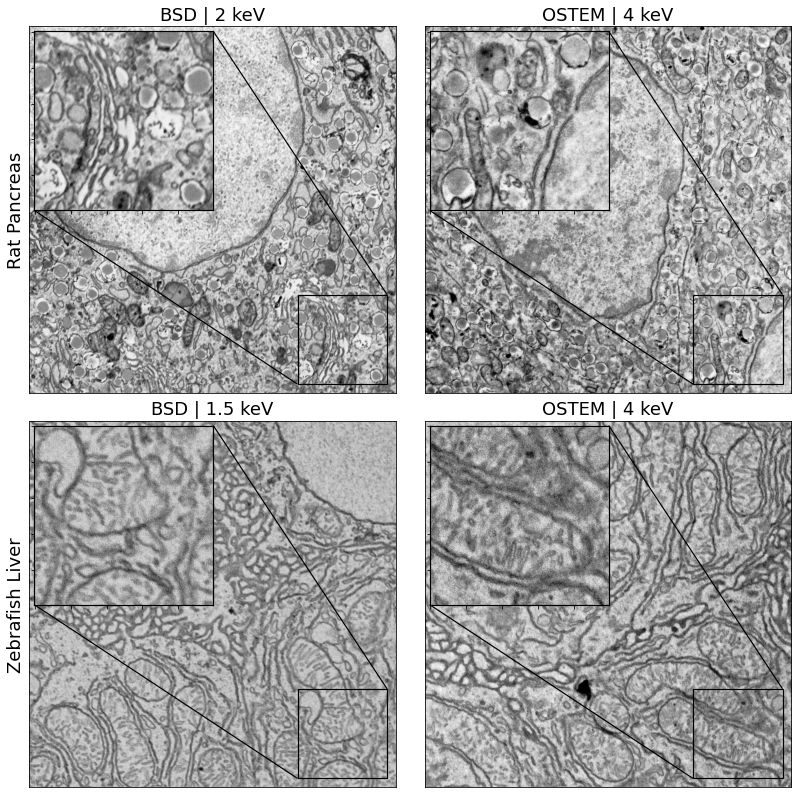

In [7]:
# Data
source = df_im.copy()

# Set font size and linewidth
fs = 18
lw = 1.2

# Make figure 
nrows, ncols = 2, 2
fig, axes = plt.subplots(ncols=ncols, nrows=nrows,
                         sharex=False, sharey=True,
                         figsize=(7*ncols, 7*nrows))
axmap = {k: v for k, v in zip(source['Tissue'].unique(), axes)}
plt.subplots_adjust(hspace=0.075)
plt.subplots_adjust(wspace=0.025)

# Group by tissue
for tissue, grp in source.groupby('Tissue'):
    
    ax = axmap[tissue]
    
    # Loop over individual images
    for k, row in grp.reset_index().iterrows():
        
        # Load image
        image = img_as_float(tifffile.imread(row['FilePos'].as_posix()))

        # Show image
        ax[k].imshow(image, cmap='Greys_r')
        ax[k].get_xaxis().set_visible(False)
        ax[k].get_yaxis().set_ticks([])
        ax[k].set_title(f"{row['DetectionMode']} | {row['LE']} keV", fontsize=fs)
        
        # Define and plot inset
        x, y, w, h = 1498, 1498, 500, 500
        axins = zoomed_inset_axes(ax[k], 2, loc=2) # zoom = 2
        # axins = ax[k].inset_axes([0.025, 0.475, 0.5, 0.5])
        # ax[k].indicate_inset_zoom(axins, edgecolor='k', lw=1.5, alpha=1)
        axins.imshow(image, cmap='Greys_r')
        
        # draw a bbox of the region of the inset axes in the parent axes and
        # connecting lines between the bbox and the inset axes area
        patch, pp1,pp2 = mark_inset(ax[k], axins, loc1=1, loc2=3, fc="none", ec="0", lw=lw)
        pp1.loc1, pp1.loc2 = 1, 4  # inset corner 1 to origin corner 4 (would expect 1)
        pp2.loc1, pp2.loc2 = 3, 2  # inset corner 3 to origin corner 2 (would expect 3)
        
        # Aesthetics
        for axis in ['top','bottom','left','right']:
            axins.spines[axis].set_linewidth(lw)
        axins.set_xlim(x, x+w)
        axins.set_ylim(y+h, y)
        axins.set_xticklabels([])
        axins.set_yticklabels([])
    
    # Axes aesthetics
    ax[0].set_ylabel(f'{tissue}', fontsize=fs)

# Save figure
# plt.savefig('qualitative comparison', dpi=150, bbox_inches='tight')